In [1]:
import matplotlib.pyplot as plt
from important_functions import *

In [2]:
def recurrence(p00,p01,p10,p11):
    #https://journals.aps.org/pra/pdf/10.1103/PhysRevA.54.3824 eqn (42,43)
    p_pass = (p00+p10)**2+(p01+p11)**2
    p00_new = (p00**2+p10**2)/p_pass
    p01_new = (p01**2+p11**2)/p_pass
    p10_new = 2*p00*p10/p_pass
    p11_new =  2*p01*p11/p_pass
    return p00_new,p01_new,p10_new,p11_new,p_pass

def xrecurrence(p00,p01,p10,p11):
    return recurrence(p00,p10,p01,p11)

In [3]:
def improved_z_recurrence(p00,p01,p10,p11):
    max_iter = 1000
    p_iter = 1
    p00_new,p01_new,p10_new,p11_new = p00,p01,p10,p11
    hash_now = p_iter*(1/2**0)*hashing([p00,p01,p10,p11])
    for iter in range(max_iter):

        p00_new,p01_new,p10_new,p11_new,p_pass = recurrence(p00_new,p01_new,p10_new,p11_new)
        p_iter = p_pass*p_iter
        hash_after_recurrence_step = p_iter*(1/2**(iter+1))*hashing([p00_new,p01_new,p10_new,p11_new])
        if hash_now > hash_after_recurrence_step:
            break
        else:
            hash_now = hash_after_recurrence_step
    return hash_now,iter

In [19]:
def improved_xz_recurrence(p00,p01,p10,p11):
    max_iter = 1000
    p_iter = 1
    p00_new,p01_new,p10_new,p11_new = p00,p01,p10,p11
    hash_now = p_iter*(1/2**0)*hashing([p00,p01,p10,p11])
    for iter in range(max_iter):

        p00_newz,p01_newz,p10_newz,p11_newz,p_passz = recurrence(p00_new,p01_new,p10_new,p11_new)
        p_iterz = p_passz*p_iter
        hash_after_z_recurrence_step = p_iterz*(1/2**(iter+1))*hashing([p00_newz,p01_newz,p10_newz,p11_newz])
        
        p00_newx,p01_newx,p10_newx,p11_newx,p_passx = xrecurrence(p00_new,p01_new,p10_new,p11_new)
        p_iterx = p_passx*p_iter
        hash_after_x_recurrence_step = p_iterx*(1/2**(iter+1))*hashing([p00_newx,p01_newx,p10_newx,p11_newx])
        
        if hash_after_x_recurrence_step > hash_after_z_recurrence_step:
            hash_after_recurrence_step = hash_after_x_recurrence_step
            p_iter = p_iterx
            p00_new,p01_new,p10_new,p11_new = p00_newx,p01_newx,p10_newx,p11_newx
        else:
            hash_after_recurrence_step = hash_after_z_recurrence_step
            p_iter = p_iterz
            p00_new,p01_new,p10_new,p11_new = p00_newz,p01_newz,p10_newz,p11_newz
        
        if hash_now > hash_after_recurrence_step:
            break
        else:
            hash_now = hash_after_recurrence_step
    return hash_now,iter

In [20]:
prange = np.arange(0.01,1,0.01)
IR = []
for p in prange:
    IR.append(improved_xz_recurrence(1-p,p/3,p/3,p/3)[0])

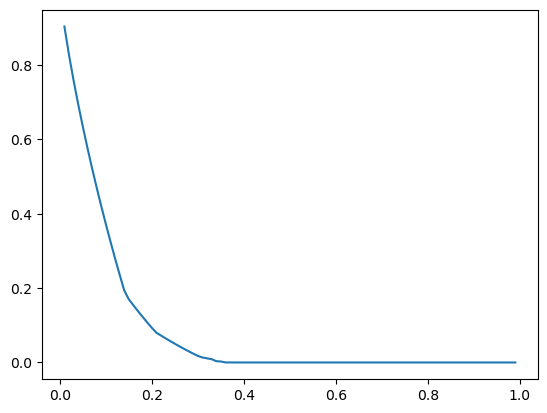

In [21]:
plt.plot(prange,IR)